                    id                                         tweet_text  \
0  1038992008461930496  Esquerda e direita empatam na Suécia; ultranac...   
1  1038873557902782465  Ao vivo: Estadão e TV Gazeta realizam terceiro...   
2  1038869931398516736  FOTOS: Apoiadores de Jair Bolsonaro realizam a...   
3  1038867128886198273  Barroso ameaça barrar propaganda se PT insisti...   
4  1038859914339409920  Serena Williams é multada pelo comportamento d...   

                       tweet_date sentiment query_used  
0  Mon Sep 10 03:26:13 +0000 2018    Neutro       veja  
1  Sun Sep 09 19:35:32 +0000 2018    Neutro       veja  
2  Sun Sep 09 19:21:07 +0000 2018    Neutro       veja  
3  Sun Sep 09 19:09:59 +0000 2018    Neutro       veja  
4  Sun Sep 09 18:41:19 +0000 2018    Neutro       veja  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37556 entries, 0 to 37555
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id

/tmp/ipykernel_34853/1078895520.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


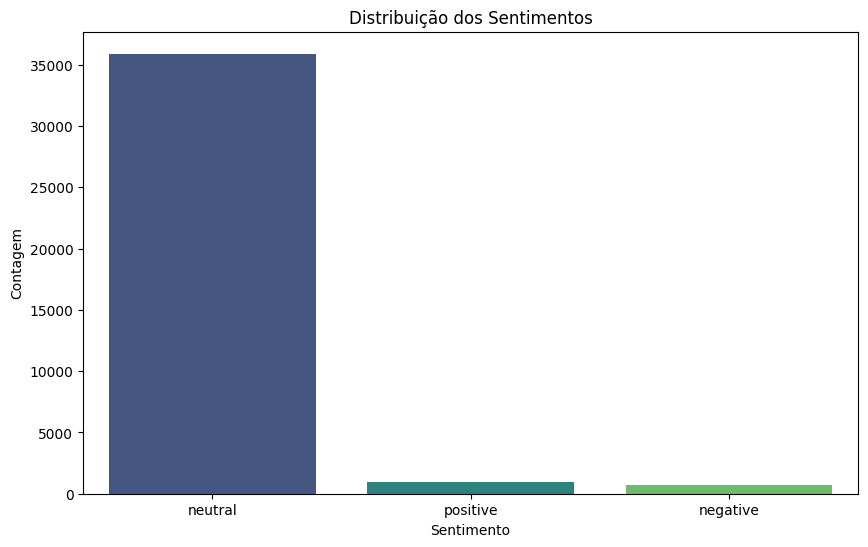

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk

# Carregar o dataset
file_path = 'dataset/Tweets.csv'
df = pd.read_csv(file_path)

# Inspecionar os dados
print(df.head())
print(df.info())

# Função para limpeza do texto
def clean_text(text):
    text = text.lower()
    text = nltk.RegexpTokenizer(r'\w+').tokenize(text)
    text = " ".join(text)
    return text

# Aplicar limpeza do texto

df['clean_text'] = df['tweet_text'].apply(clean_text)

# Função para análise de sentimento
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Aplicar análise de sentimento
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Classificar os sentimentos em positivo, negativo e neutro
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Contar a frequência de cada sentimento
sentiment_counts = df['sentiment_class'].value_counts()

# Plotar os resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribuição dos Sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()
